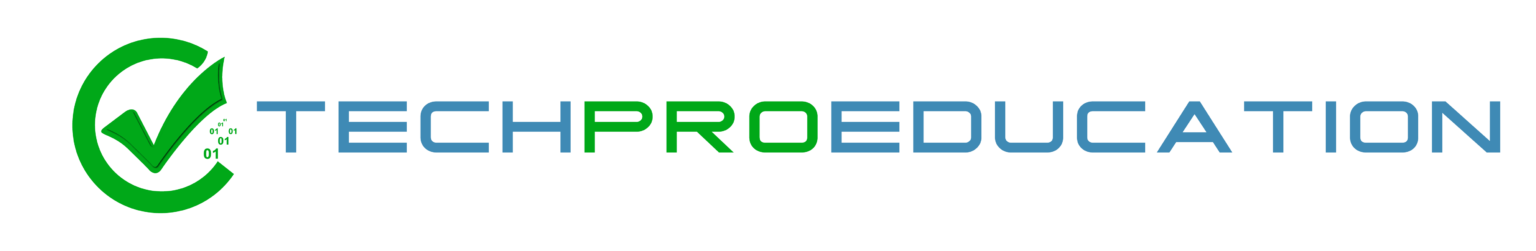

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Exploratory Data Analysis and Visualization

In [101]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [102]:
df2 = df.copy()

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [104]:
df = df.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]] # feature siralamasini degistiriyoruz.
df

,income,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,<=50K,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,<=50K,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,<=50K,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States
3,<=50K,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,<=50K,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,<=50K,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,<=50K,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,>50K,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,<=50K,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [105]:
df["fnlwgt"].value_counts()

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [106]:
df.drop("fnlwgt", axis=1, inplace=True)

**It was deleted because it had unique values such as id numbers.**

In [107]:
df.sample(5)

,income,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
3783,<=50K,58,Private,7th-8th,4,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,2936,0,50,Mexico
28082,<=50K,59,Private,HS-grad,9,Widowed,Priv-house-serv,Not-in-family,White,Female,0,0,40,United-States
24042,>50K,30,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States
12823,<=50K,52,Private,7th-8th,4,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,64,United-States
32145,<=50K,29,Self-emp-not-inc,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,45,United-States


In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
education.num,32561.000,10.081,2.573,1.000,9.000,10.000,12.000,16.000
capital.gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
capital.loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
hours.per.week,32561.000,40.437,12.347,1.000,40.000,40.000,45.000,99.000


In [109]:
df["workclass"].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [110]:
df["education"].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [111]:
df["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [112]:
df["occupation"].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [113]:
df["relationship"].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [114]:
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [115]:
df["sex"].unique()

array(['Female', 'Male'], dtype=object)

In [116]:
df["native.country"].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [117]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 
                                             'relationship', 'race', 'sex', 'native.country'])

In [118]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df

,income,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0,90,9,0,4356,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,82,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,66,10,0,4356,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,54,4,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,41,10,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,22,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,27,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,1,40,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,0,58,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [119]:
df["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

**!!Unbalanced Data!!**

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 108 entries, income to native.country_Yugoslavia
dtypes: int64(6), uint8(102)
memory usage: 4.7 MB


In [121]:
df.isna().sum().sum()

0

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
income,32561.000,0.241,0.428,0.000,0.000,0.000,0.000,1.000
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
education.num,32561.000,10.081,2.573,1.000,9.000,10.000,12.000,16.000
capital.gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
capital.loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
...,...,...,...,...,...,...,...,...
native.country_Thailand,32561.000,0.001,0.024,0.000,0.000,0.000,0.000,1.000
native.country_Trinadad&Tobago,32561.000,0.001,0.024,0.000,0.000,0.000,0.000,1.000
native.country_United-States,32561.000,0.896,0.305,0.000,1.000,1.000,1.000,1.000
native.country_Vietnam,32561.000,0.002,0.045,0.000,0.000,0.000,0.000,1.000


In [124]:
df.corr()

,income,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
income,1.000,0.234,0.335,0.223,0.151,0.230,-0.078,0.059,0.033,-0.008,...,-0.010,-0.019,0.000,-0.005,0.014,-0.004,-0.008,0.034,-0.018,0.007
age,0.234,1.000,0.037,0.078,0.058,0.069,0.043,0.051,0.061,-0.019,...,0.004,0.008,0.003,0.001,-0.014,-0.006,0.005,0.016,-0.015,0.000
education.num,0.335,0.037,1.000,0.123,0.080,0.148,-0.078,0.061,0.098,-0.015,...,-0.044,-0.041,0.001,0.016,0.049,0.008,-0.017,0.101,-0.007,-0.001
capital.gain,0.223,0.078,0.123,1.000,-0.032,0.078,-0.016,-0.006,-0.007,-0.002,...,-0.004,-0.006,-0.002,0.005,0.006,-0.003,-0.004,0.005,-0.003,-0.002
capital.loss,0.151,0.058,0.080,-0.032,1.000,0.054,-0.016,0.011,0.015,-0.003,...,-0.007,-0.005,-0.004,0.010,0.007,-0.005,0.008,0.009,-0.000,-0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native.country_Thailand,-0.004,-0.006,0.008,-0.003,-0.005,0.010,-0.000,-0.004,-0.006,-0.000,...,-0.001,-0.001,-0.000,-0.001,-0.001,1.000,-0.001,-0.069,-0.001,-0.001
native.country_Trinadad&Tobago,-0.008,0.005,-0.017,-0.004,0.008,-0.006,-0.000,-0.004,-0.001,-0.000,...,-0.001,-0.001,-0.000,-0.001,-0.001,-0.001,1.000,-0.071,-0.001,-0.001
native.country_United-States,0.034,0.016,0.101,0.005,0.009,0.002,0.006,0.015,0.033,0.005,...,-0.099,-0.174,-0.056,-0.146,-0.116,-0.069,-0.071,1.000,-0.133,-0.065
native.country_Vietnam,-0.018,-0.015,-0.007,-0.003,-0.000,-0.011,-0.002,0.000,-0.004,-0.001,...,-0.002,-0.003,-0.001,-0.002,-0.002,-0.001,-0.001,-0.133,1.000,-0.001


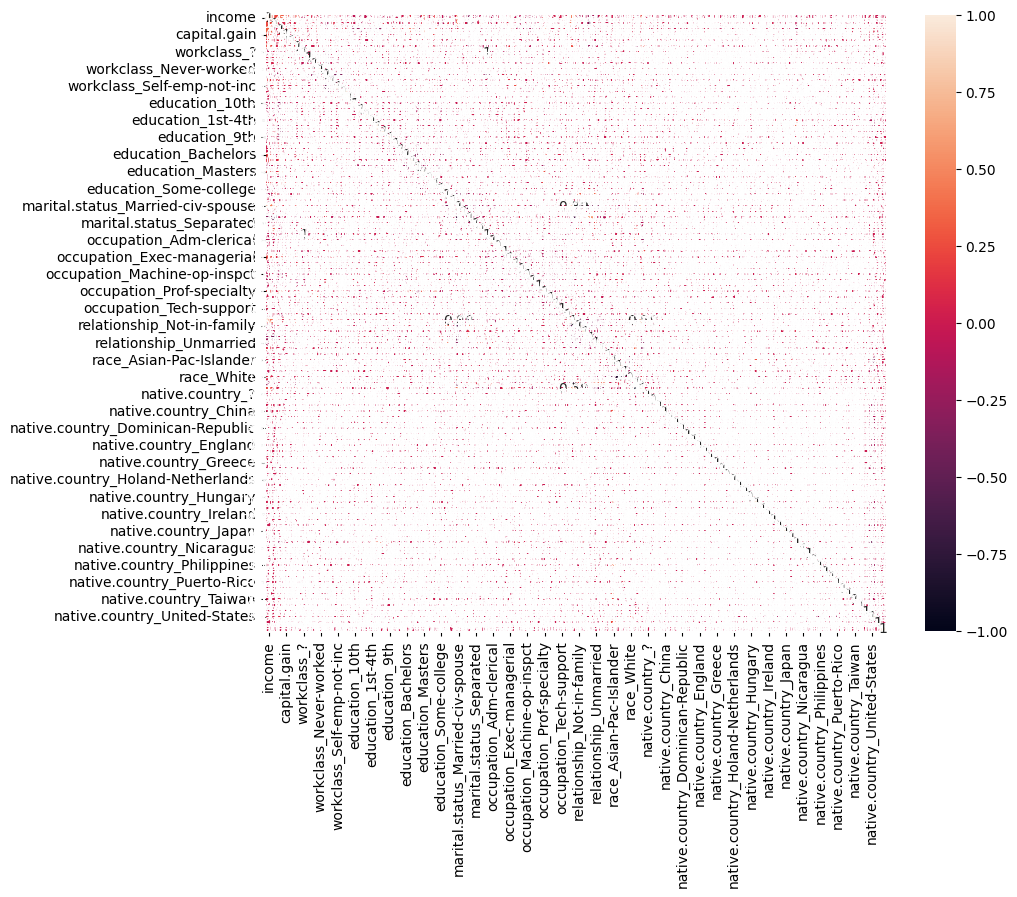

In [125]:
# plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(), annot = True);

# Logistic Regression

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report,confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [141]:
X = df.drop(["income"], axis=1)
y = df["income"]

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y)

In [146]:
log_model = LogisticRegression(random_state=42)

In [147]:
operations = [("scaler", StandardScaler()), ("log_model", log_model)]
                                        
pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[2319  154]
 [ 315  469]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2473
           1       0.75      0.60      0.67       784

    accuracy                           0.86      3257
   macro avg       0.82      0.77      0.79      3257
weighted avg       0.85      0.86      0.85      3257


Train_Set
[[20714  1533]
 [ 2800  4257]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     22247
           1       0.74      0.60      0.66      7057

    accuracy                           0.85     29304
   macro avg       0.81      0.77      0.78     29304
weighted avg       0.85      0.85      0.85     29304



In [150]:
operations = [("scaler", StandardScaler()), ("log_model", log_model)]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.850
test_precision   0.730
test_recall      0.600
test_f1          0.659
dtype: float64

# K-Nearest Neighbors (KNN) Classification

# Support Vector Classifier

# Conclusion